Mario Gibson Maia Pinto - 1924979 - MBA em Ciência de Dados - Introdução a Aprendizagem de Máquina - Prof. Enerson A. Oliveira

***

**Resumo do Trabalho**

Este trabalho tem por finalidade a criação de um modelo de AM (Aprendizado de Máquina) que objetiva prever, a partir de dados acerca de métricas de desempenho dos jogadores da NBA, se o salário do jogador Stephen Curry é justo.

Para isto então, foram construídos diversos modelos de AM e observadas as métricas de performance obtidas no treinamento de cada modelo, utilizando-se de diferentes estratégias de separação de conjuntos de testes e treinamentos, objetivando um melhor resultado.

Após a observação dessas métricas, foi a realizada a escolha do modelo mais promissor e a avaliaçao final do modelo visando responder o questionamento deste trabalho.

***

**Solução Técnica**

Inicialmente é realizada a leitura dos dados do arquivo CSV fornecido em sala de aula, contendo informações sobre os jogadores da NBA, armazenando-os em um dataframe. Após análise dos tipos de atributos realizou-se um tratamento inicial desses dados, com a realização de conversão de tipos de dados, correções de falhas e informações faltantes. 

Após essa etapa, foram listados atributos com maior correlação ao atributo buscado (salário) e a partir dessa informação, realizada a criação de conjuntos de treinamento e testes, estratégia inicialmente utilizada neste trabalho.

Os modelos de AM, utilizando os algoritimos Linear Regression, Decision Tree Regressor e Random Forest Regressor, foram criados sequencialmente, de acordo com a observação do resultado de cada um. Diferentes técnicas de validação e universos diferentes de dados foram sendo utilizados, objetivando a melhoria dos resultados à cada modelo.

Para a criação dos modelos foi utilizada a biblioteca Scikit-Learn, estrutura da linguagem Python, que implementa diversos algoritmos de AM de maneira eficiente (1).

***

**Índice**

1. Exploração dos Dados
    - 1.1 Visualização Geral dos Dados
    - 1.2 Tratamento Inicial dos Dados
    - 1.3 Análise de Atributos e Tratamentos Adicionais 
2. Criação dos conjuntos de treinamento e testes
3. Preparação dos dados para modelos de AM
4. Treinamento e Avaliação dos Conjuntos de Treinamento
    - 4.1 Linear Regression
    - 4.2 Decision Tree Regressor
    - 4.3 Random Forest Regressor
5. Avaliação Utilizando Avaliação Cruzada
    - 5.1 Linear Regression
    - 5.2 Decision Tree Regressor
    - 5.3 Random Forest Regressor
6. Ajuste do Modelo Selecionado
7. Avaliação do Modelo Final
8. Predição do salário justo do Stephen Curry

***

# Exploração dos Dados

## Visualização Geral dos Dados

Inicialmente, realizou-se a leitura das informações do arquivo CSV e o armazenamento desses dados em um dataframe, com o auxílio da biblioteca Pandas do Python. Essas informações foram copiadas em um novo dataframe para preservação dos dados originais.

In [322]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

# Lendo a partir do arquivo CSV
df_original = pd.read_csv('NBA_Players.csv', sep=',', encoding='utf-8')

# Copiando o dataframe original em novo dataframe para preservá-lo
df = df_original.copy()

# Visualizando registros iniciais e finais do dataframe criado
df

,TEAM,NAME,EXPERIENCE,URL,POSITION,AGE,HT,WT,COLLEGE,SALARY,...,FGP,THM_THA,THP,FTM_FTA,FTP,APG,BLKPG,STLPG,TOPG,PPG
0,Boston Celtics,Aron Baynes,6,http://www.espn.com/nba/player/_/id/2968439,SF,31,208.28,117.65,Washington State,"5,193,600",...,0.502,0.0-0.1,0.143,1.0-1.3,0.802,0.7,0.5,0.2,0.8,5.4
1,Boston Celtics,Justin Bibbs,0,http://www.espn.com/nba/player/_/id/3147500,G,22,195.58,99.55,Virginia Tech,Not signed,...,0.000,0,0.000,0,0.000,0.0,0.0,0.0,0.0,0.0
2,Boston Celtics,Jabari Bird,1,http://www.espn.com/nba/player/_/id/3064308,SG,24,198.12,89.59,California,"1,349,464",...,0.577,0.2-0.5,0.429,0.5-1.0,0.462,0.6,0.1,0.2,0.6,3.0
3,Boston Celtics,Jaylen Brown,2,http://www.espn.com/nba/player/_/id/3917376,F,21,200.66,99.55,California,"5,169,960",...,0.461,1.1-3.0,0.379,1.6-2.4,0.658,1.2,0.3,0.7,1.3,10.4
4,Boston Celtics,PJ Dozier,1,http://www.espn.com/nba/player/_/id/3923250,PG,21,198.12,92.76,South Carolina,Not signed,...,0.500,0.0-0.0,0.000,0.0-0.0,0.000,0.0,0.0,0.0,0.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,Utah Jazz,Georges Niang,2,http://www.espn.com/nba/player/_/id/2990969,SF,25,203.20,104.07,Iowa State,"1,512,601",...,0.277,0.0-0.5,0.063,0.1-0.1,0.750,0.3,0.0,0.2,0.3,0.9
546,Utah Jazz,Royce O'Neale,1,http://www.espn.com/nba/player/_/id/2583632,SF,25,198.12,102.26,Baylor,"1,378,242",...,0.423,0.6-1.7,0.356,0.9-1.1,0.803,1.4,0.2,0.5,0.8,5.0
547,Utah Jazz,Ricky Rubio,7,http://www.espn.com/nba/player/_/id/4011,PG,27,193.04,85.97,-,"14,975,000",...,0.385,0.8-2.4,0.325,3.2-3.8,0.836,7.9,0.1,2.0,2.8,10.8
548,Utah Jazz,Thabo Sefolosha,12,http://www.espn.com/nba/player/_/id/3028,SF,34,200.66,99.55,-,"5,250,000",...,0.449,0.6-1.7,0.347,0.8-1.1,0.737,1.5,0.4,1.1,0.9,6.1


Nas informações exibidas acima podem ser observados itens como:
- Existência de colunas irrelevantes para o objetivo do trabalho ("NAME" e "URL");
- Existência de colunas numéricas com visível diferença escalar (Exemplos: "SALARY" e "FGP");
- Existência de colunas sem informações (Exemplos: "0", "-", "Not signed");
- Existência de colunas contendo mais de uma informação (Exemplo: "THM_THA", "FTM_FTA");
- Existência de linhas sem informações sobre indicadores de performance do jogador (somente contendo informações como universidade, posição, peso, altura, etc);
- Existência de linhas sem informações para a coluna "SALARY", objetivo do modelo a ser construído neste trabalho.

Através do método info() do dataframe, foi obtido uma descrição dos dados como o número total de linhas, tipo de cada atributo e número de valores não nulos.

In [323]:
# Visualizando informações sobre o dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 30 columns):
TEAM                550 non-null object
 NAME               550 non-null object
 EXPERIENCE         550 non-null int64
 URL                550 non-null object
 POSITION           550 non-null object
 AGE                550 non-null object
 HT                 550 non-null float64
 WT                 550 non-null float64
 COLLEGE            550 non-null object
 SALARY             550 non-null object
 PPG_LAST_SEASON    538 non-null float64
 APG_LAST_SEASON    538 non-null float64
 RPG_LAST_SEASON    538 non-null float64
 PER_LAST_SEASON    538 non-null float64
 PPG_CAREER         550 non-null float64
 APG_CAREER         550 non-null float64
 RGP_CAREER         550 non-null float64
 GP                 550 non-null int64
 MPG                550 non-null float64
 FGM_FGA            550 non-null object
 FGP                550 non-null float64
 THM_THA            550 non-null object
 THP  

Nota-se a presença de 30 colunas com diferentes tipos de dados em um total de 550 linhas. Destas linhas, alguns atributos possuem atributos nulos como "PPG_LAST_SEASON", "APG_LAST_SEASON", "RPG_LAST_SEASON" e "PER_LAST_SEASON".

Observado a coluna "SALARY" (objetivo do modelo a ser construído) e a coluna "AGE", nota-se que ambas possuem tipo de dado object, fazendo com que sejam necessárias suas conversões para valores numéricos posteriormente.

Também é possível perceber a existência de espaços em branco no início do título das colunas, com exceção da primeira coluna "TEAM".

## Tratamento inicial dos dados

Inicialmente, será realizado o tratamento nos títulos da colunas para resolver o problema citado no item anterior.

In [324]:
# Removendo espaços em brancos no início das descrições de algumas colunas, observadas no passo anterior
df.columns = [i.strip() for i in df.columns.tolist()]

A seguir, serão realizados outros tratamentos de dados, objetivando a resolução de problemas observados nos itens anteriores.

In [325]:
# Tratando o atributo "AGE" e convertendo-o para numérico
df['AGE'] = df['AGE'].str.replace('-', '0')
df['AGE'] = df['AGE'].astype(int)

# Tratando o atributo "SALARY" e convertendo-o para numérico
df['SALARY'] = df['SALARY'].str.replace('Not signed', '0')
df['SALARY'] = df['SALARY'].str.replace(',', '')
df['SALARY'] = df['SALARY'].astype(float)

# Removendo colunas em que não foram observadas relevância para o objetivo do problema 
# A coluna NAME será excluída posteriormente
df = df.drop(columns=['TEAM', 'URL', 'COLLEGE'])

Sabendo-se da existência de colunas contendo mais de uma informação, como visto no passo anterior, é necessário que se investigue as informações de colunas omitidas na visualização inicial do dataframe, como a coluna "FGM_FGA", que possui a estrutura de sua descrição similar às colunas "THM_THA" e "FTM_FTA".

In [326]:
df['FGM_FGA'].head()

0    2.2-4.3
1          0
2    1.2-2.0
3    3.8-8.3
4    0.5-1.0
Name: FGM_FGA, dtype: object

Após a investigação, realizou-se o tratamento das colunas com mais de uma informação, realizando o particionamento dos dados contidos nestas e a conversão destes para tipo numérico. Após esse procedimento as colunas tratadas são excluídas do dataframe.

In [327]:
# Particionando atributos que possuem mais de uma informação e convertendo-os para numérico
df[['FGM','FGA']] = df.FGM_FGA.str.split("-",expand=True,)
df['FGM'] = df['FGM'].astype(float)
df['FGA'] = df['FGA'].astype(float)

df[['THM','THA']] = df.THM_THA.str.split("-",expand=True,)   
df['THM'] = df['THM'].astype(float)
df['THA'] = df['THA'].astype(float)

df[['FTM','FTA']] = df.FTM_FTA.str.split("-",expand=True,)  
df['FTM'] = df['FTM'].astype(float)
df['FTA'] = df['FTA'].astype(float)

# Removendo colunas que foram particionadas
df = df.drop(columns=['FGM_FGA', 'THM_THA', 'FTM_FTA'])

# Removendo dos atributos criados valores que porventura sejam nulos
num_attribs = ['FGM','FGA','THM','THA','FTM','FTA']

Neste passo, serão excluídos do dataframe os dados do jogador Stephen Curry, pois seu salário é o objetivo das predições que serão realizadas neste trabalho e não haveria sentido que estas informações fossem fornecidas aos algoritmos de aprendizagem de máquina. Os dados do jogador serão salvos para a realização da predição final do trabalho.

In [328]:
df_stc = df[(df['NAME'] == 'Stephen Curry')] 

df = df[(df['NAME'] != 'Stephen Curry')] 

Tendo em vista que o atributo "SALARY" é o objetivo do modelo a ser construído, serão excluídas todas as linhas do dataframe com valores zerados neste atributo, de modo que os conjuntos de treinamento e teste, a serem construídos posteriormente, não contenham informações que possam distorcer os resultados obtidos pelos algoritmos de aprendizado de máquina.

In [329]:
# Removendo linhas com o salário zerado
df = df[(df['SALARY'] != 0)] 

df.shape

(439, 30)

Após este passo, visualizamos através do atributo "shape" que o dataframe passou a contar com 439 linhas (111 linhas a menos) e 29 colunas.

## Análise de Atributos e Tratamentos Adicionais

Através do método describe() é exibido um resumo dos atributos numéricos, possibitando uma análise mais detalhada dos valores presentes no dataframe trabalhado.

In [330]:
df.describe()

,EXPERIENCE,AGE,HT,WT,SALARY,PPG_LAST_SEASON,APG_LAST_SEASON,RPG_LAST_SEASON,PER_LAST_SEASON,PPG_CAREER,...,BLKPG,STLPG,TOPG,PPG,FGM,FGA,THM,THA,FTM,FTA
count,439.000000,439.000000,439.000000,439.000000,4.390000e+02,435.000000,435.000000,435.000000,435.000000,439.000000,...,439.000000,439.000000,439.000000,439.000000,439.000000,387.000000,439.000000,387.000000,439.000000,387.000000
mean,4.826879,25.961276,201.036082,99.115809,7.722517e+06,8.761149,3.198161,2.034943,12.521931,8.349886,...,0.407745,0.647608,1.130068,8.349886,3.121640,7.776227,0.677677,2.188114,1.426651,2.148579
std,4.200142,4.387181,8.569305,10.802182,7.869469e+06,6.399171,2.828834,1.880649,6.569076,5.642496,...,0.424570,0.428268,0.793701,5.642496,2.067085,3.914991,0.633179,1.646448,1.275120,1.563680
min,0.000000,18.000000,175.260000,76.920000,8.384640e+05,0.000000,0.000000,0.000000,-3.190000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,22.000000,195.580000,90.500000,1.620948e+06,4.100000,1.000000,0.450000,9.400000,4.650000,...,0.100000,0.400000,0.600000,4.650000,1.750000,5.000000,0.000000,0.800000,0.500000,1.000000
50%,4.000000,25.000000,200.660000,99.550000,4.320500e+06,7.900000,2.500000,1.600000,13.130000,7.600000,...,0.300000,0.600000,1.000000,7.600000,2.900000,7.200000,0.600000,2.000000,1.100000,1.800000
75%,7.000000,29.000000,208.280000,107.240000,1.167651e+07,12.750000,4.700000,3.100000,16.480000,11.800000,...,0.550000,0.900000,1.500000,11.800000,4.400000,10.500000,1.100000,3.300000,1.900000,2.700000
max,20.000000,41.000000,220.980000,131.220000,3.565415e+07,30.400000,16.000000,12.300000,29.870000,27.200000,...,2.400000,2.300000,4.000000,27.200000,9.900000,19.600000,2.900000,7.300000,7.100000,8.500000


Percebe-se que os valores do salário, atributo alvo do trabalho, é exibido em notação científica. Este atributo então será convertido (divindo-se por milhares de dólares) para possibilitar um melhor entendimento e visualização dos dados.

A partir desse ponto o atributo salário passará a ser representado pelo atributo "SALARY_IN_MILLION".

In [331]:
def converter_salario(df):

    # Dividindo a coluna "SALARY" por 1000000
    df['SALARY'] = df['SALARY'] / 1000000

    # Renomendo a coluna 
    df.rename(columns={'SALARY':'SALARY_IN_MILLION'}, inplace=True)
    
    return df

df = converter_salario(df)

Utilizando-se o método corr() é possível que se obtenha o coeficiente de correlação padrão entre cada parte de atributo do dataframe trabalhado.

In [332]:
corr_matrix = df.corr()
corr_matrix['SALARY_IN_MILLION'].sort_values(ascending=False)

SALARY_IN_MILLION    1.000000
PPG_LAST_SEASON      0.648208
PPG_CAREER           0.630672
PPG                  0.630672
FTM                  0.620123
FGM                  0.618057
FTA                  0.585777
MPG                  0.584141
FGA                  0.564354
TOPG                 0.543921
APG_LAST_SEASON      0.523166
STLPG                0.522346
PER_LAST_SEASON      0.495534
APG_CAREER           0.494295
GP                   0.490899
EXPERIENCE           0.459511
APG                  0.451511
BLKPG                0.361760
AGE                  0.360819
RPG_LAST_SEASON      0.353309
RGP_CAREER           0.352200
THM                  0.337213
FGP                  0.296525
FTP                  0.288577
THA                  0.256248
THP                  0.255108
WT                   0.139499
HT                   0.054995
Name: SALARY_IN_MILLION, dtype: float64

Visualizando os coeficientes acima é possível perceber que o atributo "PPG_LAST_SEASON" possui a maior correlação com o atributo alvo. Também é possível notar atributos com coeficientes idênticos de correlação ("PPG_CAREER" e "PPG").  

No item a seguir é realizada a investigação dos atributos com coeficientes idênticos.

In [333]:
print(df.PPG_CAREER.describe())
print(df.PPG.describe())

count    439.000000
mean       8.349886
std        5.642496
min        0.000000
25%        4.650000
50%        7.600000
75%       11.800000
max       27.200000
Name: PPG_CAREER, dtype: float64
count    439.000000
mean       8.349886
std        5.642496
min        0.000000
25%        4.650000
50%        7.600000
75%       11.800000
max       27.200000
Name: PPG, dtype: float64


Nota-se que todos os valores exibidos nos resumos dos atributos através do método describe() possuem valores idênticos, sendo possível concluir então que tratam-se de atributos repetidos.

No passo a seguir então a coluna "PPG" do dataframe será excluída.

In [334]:
df = df.drop(columns=['PPG'])

A seguir é exibido um gráfico de dispersão da correlação entre o atributo mais promissor "PPG_LAST_SEASON" e o atributo alvo.

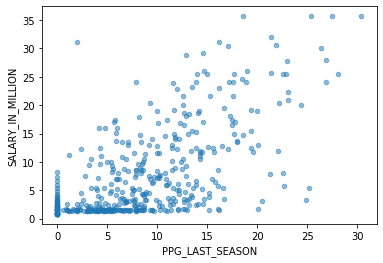

In [335]:
g=df.plot(kind='scatter',x='PPG_LAST_SEASON',y='SALARY_IN_MILLION', alpha=0.5)

Através do gráfico gerado é possível perceber uma tendência ascendente na correlação, apesar de muitos pontos estarem dispersos. Também é possível notar a presença, aparentemente, de grande quantidade de dados no início do eixo X (atributo "PPG_LAST_SEASON"), o que será investigado a seguir.

In [336]:
df.groupby('PPG_LAST_SEASON').PPG_LAST_SEASON.count()

PPG_LAST_SEASON
0.0     53
0.6      1
0.9      1
1.0      4
1.2      3
        ..
26.4     1
26.9     2
27.5     1
28.1     1
30.4     1
Name: PPG_LAST_SEASON, Length: 167, dtype: int64

No passo anterior, nota-se que os dados presentes no ínicio do eixo X do gráfico gerado tratam-se de dados zerados do atributo "PPG_LAST_SEASON". De fato, como identificado anteriormente na seção de visualização geral dos dados, existem linhas em que os indicadores de performance dos jogadores estão com valores ausentes, incluindo o atributo em questão.

A seguir, serão excluídas do dataframe linhas que possuem todos os indicadores de performance dos atletas zerados.

In [337]:
# Removendo indicadores de performance zerados
df = df[(df.PPG_LAST_SEASON != 0) & (df.PPG_CAREER != 0) & (df.FGM != 0) & (df.MPG != 0) & 
        (df.FTM != 0) & (df.FGA != 0) & (df.FTA != 0) & (df.PER_LAST_SEASON != 0) &
        (df.TOPG != 0) & (df.STLPG != 0) & (df.APG_LAST_SEASON != 0) & (df.APG_CAREER != 0) & 
        (df.GP != 0) & (df.APG != 0) & (df.EXPERIENCE != 0) & (df.THM != 0) & 
        (df.RPG_LAST_SEASON != 0) & (df.THA != 0) & (df.RGP_CAREER != 0) & (df.BLKPG != 0) & 
        (df.FTP != 0) & (df.FGP != 0) & (df.THP != 0)]

No passo a seguir é exibido um novo resumo do dataframe após os tratamentos efetuados nos passos anteriores.

In [338]:
df.describe()

,EXPERIENCE,AGE,HT,WT,SALARY_IN_MILLION,PPG_LAST_SEASON,APG_LAST_SEASON,RPG_LAST_SEASON,PER_LAST_SEASON,PPG_CAREER,...,APG,BLKPG,STLPG,TOPG,FGM,FGA,THM,THA,FTM,FTA
count,303.000000,303.000000,303.000000,303.000000,303.000000,300.000000,300.000000,300.000000,300.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,5.544554,26.732673,199.721122,97.728845,8.759812,10.934333,3.486333,2.609333,14.110533,10.199670,...,2.247855,0.411881,0.792409,1.357426,3.768977,8.461386,0.939604,2.663696,1.720792,2.216832
std,4.012872,4.067048,8.151779,9.769092,8.309671,5.899565,2.500217,1.817615,4.672659,5.101399,...,1.684754,0.363925,0.371646,0.730737,1.847684,3.887822,0.571233,1.483531,1.299769,1.591101
min,1.000000,20.000000,175.260000,76.920000,1.349383,1.000000,0.100000,0.100000,1.900000,1.200000,...,0.100000,0.100000,0.100000,0.100000,0.300000,1.400000,0.100000,0.200000,0.100000,0.200000
25%,2.000000,24.000000,193.040000,90.500000,2.034120,6.500000,1.500000,1.100000,10.967500,6.500000,...,1.100000,0.200000,0.500000,0.800000,2.400000,5.550000,0.500000,1.450000,0.800000,1.100000
50%,5.000000,26.000000,200.660000,97.290000,5.460000,10.000000,2.900000,2.500000,13.680000,9.200000,...,1.700000,0.300000,0.700000,1.200000,3.400000,7.700000,0.900000,2.600000,1.400000,1.800000
75%,8.000000,29.000000,205.740000,104.980000,12.518764,14.225000,4.900000,3.800000,16.502500,13.100000,...,2.950000,0.500000,1.000000,1.800000,4.800000,10.850000,1.300000,3.600000,2.100000,2.700000
max,20.000000,41.000000,220.980000,122.170000,35.654150,30.400000,12.900000,12.300000,29.870000,27.200000,...,9.800000,2.400000,2.300000,4.000000,9.900000,19.600000,2.900000,7.300000,7.100000,8.300000


***

# Criação dos conjuntos de treinamento e testes

A fim de que possamos mais a frente realizar testes no modelo que será construído no decorrer deste trabalho, os dados trabalhados serão divididos em dois conjuntos: Conjunto de Treinamento e Conjunto de Testes.

Como o universo de dados é bastante pequeno (somente 301 linhas), será utilizada a estratégia de amostragem estratificada para evitar o risco de ocorrência de viés significativo de amostragem.

Será escolhido o atributo "PPG_LAST_SEASON" para a estratificação do conjunto, por ser o atributo de maior correlação com o atributo alvo.

In [339]:
import numpy as np
from sklearn.model_selection import train_test_split

# Criando categorias (limitadas a 5) para a coluna PPG_LAST_SEASON dentro do dataframe
df['PPG_LAST_SEASON_CAT'] = np.ceil(df['PPG_LAST_SEASON'] / 1.5) 
df['PPG_LAST_SEASON_CAT'].where(df['PPG_LAST_SEASON_CAT'] < 5, 5.0, inplace=True)

# Criando uma base de testes estratificada a partir das categorias criadas no dataframe
strat_train_set, strat_test_set = train_test_split(df, test_size = 0.3, random_state = 42, 
                                                   stratify = df['PPG_LAST_SEASON_CAT'])

# Removendo a coluna PPG_LAST_SEASON_CAT dos dataframes de testes para deixá-lo no estado original
df = df.drop(columns=['PPG_LAST_SEASON_CAT'])
train_set = strat_train_set.drop(columns=['PPG_LAST_SEASON_CAT'])
test_set = strat_test_set.drop(columns=['PPG_LAST_SEASON_CAT'])

***

# Preparação dos dados para modelos de AM

A partir deste passo, será iniciada a preparação dos dados para a criação do modelo de aprendizagem de máquina.

Será excluindo do conjunto de treinamento o atributo "SALARY_IN_MILLION", pois é o atributo alvo do modelo a ser construído. Os valores deste atributo serão copiado para que possam ser realizadas conferências com as predições futuras.

In [340]:
# Preservando conjunto de dados original
train_set_original = train_set.copy()

# Excluindo a coluna salário
nba = train_set.drop('SALARY_IN_MILLION', axis=1)
nba_labels = train_set['SALARY_IN_MILLION'].copy()

Neste ponto, serão montados os pipelines que realizam o sequenciamento de transformações nos dados que servirão de entrada nos algoritmos que serão utilizados. Para possibilitar reaproveitamento de código futuro, serão definidos métodos para a criação desse pipeline e para a transformação do conjunto (transformação de um conjunto de dados em um conjunto de parâmetros).

In [341]:
from sklearn.base import BaseEstimator, TransformerMixin

# Função para criar pipelines
def criar_pipeline():

    from sklearn.pipeline import Pipeline
    from sklearn.impute import SimpleImputer
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import OneHotEncoder
    from sklearn.compose import ColumnTransformer

    # Lista de atributos numéricos
    num_attribs = ['PPG_LAST_SEASON','PPG_CAREER','FGM','MPG','FTM','FGA','FTA','PER_LAST_SEASON',
                   'TOPG','STLPG','APG_LAST_SEASON','APG_CAREER','GP','APG','EXPERIENCE','THM',
                   'RPG_LAST_SEASON','THA','RGP_CAREER','BLKPG','FTP','FGP','THP','AGE','WT','HT']
    
    # Lista de categorias
    cat_attribs = ['POSITION']

    # Pipeline de atributos numéricos
    num_pipeline = Pipeline([('imputer', SimpleImputer(strategy = "mean")),                     
                             ('scaler', StandardScaler())])

    # Pipeline de atributos categóricos
    cat_pipeline = Pipeline([('imputer', SimpleImputer(strategy = 'constant', fill_value = 'missing')),
                             ('encoder', OneHotEncoder(sparse = False))])

    # União dos pipelines    
    full_pipeline = ColumnTransformer(transformers=[('cat_pipeline', cat_pipeline, cat_attribs),
                                                    ('num_pipeline', num_pipeline, num_attribs)])
   
    return full_pipeline

In [342]:
# Trasformando o meu conjunto de treinamento (Transforma um conjunto de dados em parâmetros)
def tranformar_conjunto(dataframe, pipeline):
    
    dataframe_prepared = pipeline.fit_transform(dataframe)
    return dataframe_prepared

In [343]:
pipeline = criar_pipeline()

nba_prepared = tranformar_conjunto(nba, pipeline)

O código acima realiza o sequenciamento dos pipelines em um único pipeline, realizando as seguintes ações:

- Criação de um pipeline para atributos numéricos;
- Criação de um pipeline para atributos catégoricos;
- Criação de um único pipeline contendo os dois pipelines citados acima.

Para a criação do pipeline de atributos numéricos utilizamos a classe SimpleImputer para preencher atributos ausentes com a média desses atributos. 

Neste pipeline também é realizado o escalonamento desses valores, pois algoritmos de aprendizado de máquina, salvo exceções, não funcionam bem quando atributos numéricos de entrada tem escalas muito diferentes (1). Para a realização deste procedimento utilizamos a classe StandardScale() pois ela é menos afetada por outliers (1).

Para a criação do pipeline de atributos categóricos utilizamos a classe SimpleImputer para o preenchimento de atributos ausentes. Para a transformaçao desses em valores numéricos que possam ser interpretado pelos algoritmos de AM utilizamos a classe OneHotEncoder.

***

# Treinamento e Avaliação dos Conjuntos de Treinamento

Nas seções a seguir serão realizados treinamentos de modelos de aprendizado de máquina utilizando os algoritmos Linear Regression, Decision Tree Regressor e Random Forest Regressor.

Para o cálculo da medida de desempenho utilizaremos o RMSE (Raiz do Erro Quadrático Médio), que dá uma ideia da quantidade de erros gerados pelo sistema em suas previsões e o cálculo de acurácia do algoritmo (score). 

In [344]:
from sklearn.metrics import mean_squared_error

def calcular_rmse(labels, predicted):
    return np.sqrt(mean_squared_error(labels, predicted))

def calcular_score(algoritmo, labels, prepared):
    return algoritmo.score(prepared, labels)

## Linear Regression

In [345]:
from sklearn.linear_model import LinearRegression

# Treinando o modelo com o algoritmo Linear Regression
lin_reg = LinearRegression()
lin_reg = lin_reg.fit(nba_prepared, nba_labels)

score = calcular_score(lin_reg, nba_labels, nba_prepared)
print("SCORE: " +str(score)) 

nba_predicted = lin_reg.predict(nba_prepared)
rmse = calcular_rmse(nba_labels, nba_predicted)
print("RMSE: " + str(rmse))

SCORE: 0.6298108090763956
RMSE: 5.162598139991016


## Decision Tree Regressor

In [346]:
from sklearn.tree import DecisionTreeRegressor

# Treinando o modelo com o algoritmo Decision Tree Regressor
dec_tree_reg = DecisionTreeRegressor()
lin_reg = dec_tree_reg.fit(nba_prepared, nba_labels)

score = calcular_score(dec_tree_reg, nba_labels, nba_prepared)
print("SCORE: " +str(score)) 

nba_predicted = dec_tree_reg.predict(nba_prepared)
rmse = calcular_rmse(nba_labels, nba_predicted)
print("RMSE: " + str(rmse))

SCORE: 0.9999999999997135
RMSE: 4.542254448145432e-06


## Random Forest Regressor

In [347]:
from sklearn.ensemble import RandomForestRegressor

# Treinando o modelo com o algoritmo Random Forest Regressor
rand_forest_reg = RandomForestRegressor()
rand_forest_reg = rand_forest_reg.fit(nba_prepared, nba_labels)

score = calcular_score(rand_forest_reg, nba_labels, nba_prepared)
print("SCORE: " +str(score)) 

nba_predicted = rand_forest_reg.predict(nba_prepared)
rmse = calcular_rmse(nba_labels, nba_predicted)
print("RMSE: " + str(rmse))

SCORE: 0.921581319248401
RMSE: 2.376108235963234


Acerca dos resultados obtidos nos treinamentos realizados obtem-se as seguintes considerações:

- O algoritmo Linear Regression obteve score = 0,62 e RMSE = 5,16 aproximadamente.

- O algoritmo Decision Tree Regressor obteve score próximo a 1. Como não existe modelo perfeito, pode-se concluir que provavelmente o modelo está se sobreajustando mal aos dados.

- O algoritmo Random Forest Regressor obteve score = 0,92 e RMSE = 2,37 aproximadamente. Entre os três algoritmos utilizados este parece ser o mais promissor, já que o Decision Tree está sobreajustando os dados o Linear Regression apresenta um RMSE bem maior.



***

# Avaliação Utilizando Validação Cruzada

Nos passos a seguir realizaremos o método da validação cruzada de dados, a fim de se buscar uma melhor avaliação dos algoritmos utilizados previamente. Neste método o conjunto de treinamentos é dividido em subconjuntos complementares e cada modelo é treinado com uma combinação diferente desses subconjuntos e validados em relação ao restante (1). 

A seguir é definida uma função para a realização deste procedimento e uma função auxiliar para a exibição de escores de desempenho.

In [348]:
def display_scores(scores):
    print("SCORE: "+ str(scores)) 
    print("MEAN: " + str(scores.mean()))
    print("STANDARD DEVIATION: " + str(scores.std()))

In [349]:
# Utilizando validação cruzada para melhor avaliação
from sklearn.model_selection import cross_val_score

def realizar_validacao_cruzada(algoritmo, prepared, labels):

    scores = cross_val_score(algoritmo, prepared, labels, scoring='neg_mean_squared_error', cv = 10)
    rmse_scores = np.sqrt(-scores)
    
    return rmse_scores

## Linear Regression 

In [350]:
# Realizando validação cruzada com o algortimo Linear Regression
lin_reg_cross = LinearRegression()

scores = realizar_validacao_cruzada(lin_reg_cross, nba_prepared, nba_labels)
display_scores(scores)

SCORE: [6.02436317 8.78071011 6.47583168 5.53132399 6.32921843 7.50901945
 6.46989256 4.85342549 4.85777383 5.70583845]
MEAN: 6.253739718267413
STANDARD DEVIATION: 1.1334612955475902


## Decision Tree Regressor

In [351]:
# Realizando validação cruzada com o algortimo Decision Tree Regressor
dec_tree_reg_cross = DecisionTreeRegressor()
scores = realizar_validacao_cruzada(dec_tree_reg_cross, nba_prepared, nba_labels)
display_scores(scores)

SCORE: [ 7.94464108  9.60580539 10.70492211  4.73215811  6.43620614  9.90234146
  9.56617436  4.75371304  8.69478624  6.00238778]
MEAN: 7.834313572221994
STANDARD DEVIATION: 2.0935942255712785


## Decision Tree Regressor

In [352]:
# Realizando validação cruzada com o algortimo Random Forest
rand_forest_reg_cross = RandomForestRegressor()
scores = realizar_validacao_cruzada(rand_forest_reg_cross, nba_prepared, nba_labels)
display_scores(scores)

SCORE: [5.70720587 6.32673092 4.52273852 4.37236821 4.88652849 8.27016401
 7.10850692 3.23159324 5.10959159 6.55150026]
MEAN: 5.608692802110232
STANDARD DEVIATION: 1.4098248720005666


Analisando os resultados acima, comparando os valores obtidos em "MEAN" e comparando-os com os RMSE obtidos nos treinamentos anteriores, conclui-se que em nenhum dos treinamentos realizados utilizando a validação cruzada teve-se um desempenho superior aos treinamentos realizados anteriormente. 

***

# Ajuste do Modelo Selecionado

Nesta seção, realizaremos ajustes no modelo que utilizou o algoritmo Random Forest Regressor, modelo que obteve o melhor desempenho entre outros modelos de treinamento construídos no trabalho.

No passo a seguir, realizaremos a busca de combinações ótimas de hiperparâmetros para este modelo com o auxílio da classe RandomizedSearchCV. Esta classe seleciona um valor aleatório para cada hiperparâmetro em cada iteração e avalia um determinado número de combinações aleatórias (1). 

Ao final da execução, a função exibe a combinação de hiperparâmetros ótimos para o modelo selecionado, com o conjunto de treinamento utilizado.

In [353]:
warnings.filterwarnings('ignore')

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

def buscar_parametros_ajuste(num_iter, prepared, labels):

    rf = RandomForestRegressor()
    
    param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

    rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_distribs,
                                   n_iter = num_iter, cv = 3,verbose=2, random_state=42, n_jobs = -1)
    rf_random.fit(prepared, labels)
    
    print(rf_random.best_params_)

    return rf_random

In [354]:
rand_forest_reg_adj = buscar_parametros_ajuste(100, nba_prepared, nba_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    6.1s


{'max_features': 5, 'n_estimators': 65}


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   11.2s finished


A seguir, é realizado o treinamento do modelo Random Forest Regressor utilizando os hiperparâmetros ótimos encontrados na execução anterior.

In [355]:
rand_forest_reg_adj.fit(nba_prepared, nba_labels)

score = calcular_score(rand_forest_reg_adj, nba_labels, nba_prepared)
print("SCORE: " +str(score)) 

nba_predicted = rand_forest_reg_adj.predict(nba_prepared)
rmse = calcular_rmse(nba_labels, nba_predicted)

print("RMSE: " + str(rmse))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   10.0s finished


SCORE: 0.9441738333349943
RMSE: 2.004819868240789


Desta vez, obteve-se um resultado melhor neste treinamento com um score = 0,94 e RMSE = 2,00. Apesar deste resultado aparentar ser ótimo, ainda pode estar ocorrendo uma situação de sobreajuste aos dados de treinamento.

Numa tentativa de se melhorar o desempenho do modelo escolhido, removeremos outliers do atributo alvo buscado (SALARY_IN_MILLION) do conjunto de treinamento. Utilizaremos a estratégia Flooring and Capping (3) para este procedimento.

In [356]:
train_set2 = train_set_original.copy()
nba2 = train_set2

In [357]:
# Removendo outliers
salary_10th_percentile = nba2['SALARY_IN_MILLION'].quantile(0.10)
salary_90th_percentile = nba2['SALARY_IN_MILLION'].quantile(0.90)

nba2["SALARY_IN_MILLION"] = np.where(nba2["SALARY_IN_MILLION"] < salary_10th_percentile, 
                                           salary_10th_percentile, nba2['SALARY_IN_MILLION'])

nba2["SALARY_IN_MILLION"] = np.where(nba2["SALARY_IN_MILLION"] > salary_90th_percentile, 
                                           salary_90th_percentile, nba2['SALARY_IN_MILLION'])

nba2 = train_set2.drop('SALARY_IN_MILLION', axis=1)
nba_labels2 = train_set2['SALARY_IN_MILLION'].copy()

Iremos novamente utilizar a estratégia de treino utilizando o modelo Random Forest Regressor Ajustado, com outliers removidos.

In [358]:
pipeline2 = criar_pipeline()
nba_prepared2 = tranformar_conjunto(nba2, pipeline)

rand_forest_reg_adj2 = buscar_parametros_ajuste(100, nba_prepared2, nba_labels2)

rand_forest_reg_adj2.fit(nba_prepared2, nba_labels2)

score = calcular_score(rand_forest_reg_adj2, nba_labels2, nba_prepared2)
print("SCORE: " +str(score)) 

nba_predicted2 = rand_forest_reg_adj2.predict(nba_prepared2)
rmse = calcular_rmse(nba_labels2, nba_predicted2)

print("RMSE: " + str(rmse))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   10.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'max_features': 7, 'n_estimators': 52}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    5.7s


SCORE: 0.9370674821483724
RMSE: 1.7534840086600174


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   11.1s finished


Dessa vez obtivemos como resultados o score = 0,94 e RMSE = 1,75 aproximadamente, sendo estes, resultados aparentemente melhores do que o modelo utilizando Random Forest Regressor anterior.

Apesar dos resultados obtidos, este trabalho continuará utilizando o modelo mais promissor até então, antes do passo da remoção dos outliers, por considerar que este teve uma tendência maior ao sobreajuste de dados.

***

# Avaliação do Modelo Final

Neste passo, será realizada a avaliação do modelo final no conjunto de testes utilizando o modelo Random Forest Regressor, considerado como o modelo mais promissor.

De modo semelhante à avaliação dos conjuntos de treinamento, removeremos o atributo "SALARY_IN_MILLION" do conjunto de testes, por se tratar do atributo alvo do trabalho.

In [359]:
nba_test = test_set.drop('SALARY_IN_MILLION', axis=1) # X
nba_test_labels = test_set['SALARY_IN_MILLION'].copy() # y

In [360]:
def validar_conjunto_teste(pipeline, dataframe, labels, algoritmo):
    
    prepared = pipeline.transform(dataframe)
    predicted = algoritmo.predict(prepared)
    
    score = calcular_score(algoritmo, labels, prepared)
    print("SCORE: " +str(score)) 

    rmse = calcular_rmse(labels, predicted)
    print("RMSE: " + str(rmse))

In [361]:
# Validação do conjunto de teste utilizando o modelo Random Forest Regressor
validar_conjunto_teste(pipeline, nba_test, nba_test_labels, rand_forest_reg_adj)

SCORE: 0.566363348549858
RMSE: 5.159952277912004


Neste caso, considerando a grande diferença entre o escore obtido entre o conjunto de teste (0,57 aproximadamente) e o conjunto de treinamento utilizando Random Forest Regressor ajustado (0,93), pode-se concluir que o modelo ainda encontra-se sobreajustado aos dados de treinamento.

***

# Predição Final 

Neste passo tenta-se responder, utilizando o modelo de AM construído, ao questionamento central do trabalho: O salário do jogador Stephen Curry é justo?

Para isto, serão resgatados os dados do jogador, salvos no início do trabalho, realizando alguns tratamentos que também foram realizados no dataframe inicial, de forma que os dois dataframes tenham o mesmo número de atributos.

In [362]:
df_stc = converter_salario(df_stc)
df_stc = df_stc.drop('PPG', axis=1) # X
labels_stc = df_stc['SALARY_IN_MILLION'].copy()
df_stc = df_stc.drop('SALARY_IN_MILLION', axis=1) # X

In [363]:
stc_prepared = pipeline.transform(df_stc)
stc_predicted = rand_forest_reg_adj.predict(stc_prepared)

print(stc_predicted)
print(labels_stc)

[24.61318595]
103    37.457154
Name: SALARY_IN_MILLION, dtype: float64


De acordo com a predição final, realizada a partir do modelo construído nesse trabalho, o salário do jogador em questão deveria ser de 24 milhões, 13 milhões a menos do que seu salário real.

É importante lembrar que o modelo de AM construído nesse trabalho aparentemente encontra-se sobreajustado aos dados de treinamento, pois as métricas de desempenho (RMSE e score) são bem superiores no conjunto de treinamento em relação ao conjunto de testes, podendo comprometer o resultado final obtido.

***
# Fontes

- (1) Mãos à Obra: Aprendizado de Máquina com Scikit-Learn @ TensorFlow, Aurélien Géron
- (2) Pandas Documentation - https://pandas.pydata.org/
- (3) Cleaning up Data from Outliers - https://www.pluralsight.com/guides/cleaning-up-data-from-outliers